# Spotify Playlist Updater
#### Importing Libraries

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import csv
import re

from get_credentials import get_credentials
from extract_playlist import extract_playlist
from artistsgenres_dummies import artistsgenres_dummies
from mult_pr_NN import mult_pr_NN

from sklearn import preprocessing

#### Read in Credentials from spotify_app_credentials.txt for accessing Spotify API

In [2]:
cid,secret = get_credentials()

in txt


#### Inputting the playlist urls
1. The playlist you want to update
2. The playlist with the songs you want to consider updating your outdated playlist with

** The number of songs in Playlist_2 should be much higher than Playlist_1.

In [3]:
# # Adding the Playlist link and URI.
# Liked Songs - 4000 songs
# songs_to_add_url = "https://open.spotify.com/playlist/5F5yHyXHt6vp2taA7DrEhJ?si=b4f82e9651444f28"
# # Gym - 500 songs
# playlist_url = "https://open.spotify.com/playlist/5CYdyJ0w4OVc1oitZWQvj3?si=76db4826bb254432"

# Liked (1800)
songs_to_add_url = "https://open.spotify.com/playlist/5Laxy7mYRekGm0a3Hm7VdI?si=180ded6410634ed9"
# Gym (200)
playlist_url = "https://open.spotify.com/playlist/1UKTBRHgkdX912lBOmyEDc?si=e7ca5b3f13544694"

# # Liked Songs mask - 160 songs
# songs_to_add_url = "https://open.spotify.com/playlist/3ZqPfj9NrumTSN8mANanIK?si=bbded8c33a274d55"
# # Gym mask - 20 songs
# playlist_url = "https://open.spotify.com/playlist/5dFBFbT5ZmJruYvK8IVd6c?si=80cad7f1d80b49cd"

# # Liked (16)
# songs_to_add_url = "https://open.spotify.com/playlist/3TUNU4evtqUNJmlIrDPNIH?si=29622ac066ea4e21"
# # Gym (2)
# playlist_url = "https://open.spotify.com/playlist/73cHWYdFwcPNnhUCoFOtLI?si=95e7777d30d74d1c"

# playlist_url = input("\nWhat's the url of the playlist you are trying to update? ")
# songs_to_add_url = input("\nWhat's the url of the playlist with your song library? ")

#### Extracting parameters of each song in your outdated playlist using multiprocessing.

In [4]:
df_p = extract_playlist(playlist_url,cid,secret)
df_p.to_csv('Playlist_p.csv', encoding='utf-8', index = False)
print("There are %i songs in the playlist you want to update."%df_p.shape[0])
print(df_p.shape)

There are 191 songs in the playlist you want to update.
(191, 25)


#### Extracting parameters of each song to be considered to add to your outdated playlist using multiprocessing.

In [5]:
df_sta = extract_playlist(songs_to_add_url,cid,secret)
print("There are %i songs being considered to add to your outdated playlist."%df_sta.shape[0])
print(df_sta.shape)

There are 1688 songs being considered to add to your outdated playlist.
(1688, 25)


### PUL Data

#### Assigning the songs currently in the outdated playlist as positive data, and the songs to be considered as unlabelled data.

In [6]:
df_sta = df_sta.reset_index(drop=True)
df_p = df_p.reset_index(drop=True)

df_sta['in playlist'] = -2
df_p['in playlist'] = 1

df_sta.to_csv('Playlist_sta.csv', encoding='utf-8', index = False)
df_p.to_csv('Playlist_p.csv', encoding='utf-8', index = False)

#### Identify any songs that appear in both playlists

In [7]:
ip = []

# # df_unlabelled = df_sta_ag.loc[~((df_sta_ag.song_fil.isin(df_p['song_fil']))&(df_sta_ag.artists_fil.isin(df_p['artists_fil']))),:]
for index, row in df_sta.iterrows():
    for index2, row2 in df_p.iterrows():
        if row['song_fil'] == row2['song_fil'] and row['artists_fil'] == row2['artists_fil']:
        #     print(row['song_fil'], row['artists_fil'])
            in_playlist = index
            ip.append(in_playlist)

print("There are %i songs that appear in both playlists." %len(ip))
# print(ip)

element pop smoke
homicide logic, eminem
gtg freddie dredd
all alone freddie dredd
e-er dj scheme, ski mask the slump god, danny towers, lil yachty
courtesy call thousand foot krutch
blood oceans (how many?) ghostemane, pharaoh
dynasties and dystopia (from the series arcane league of legends) denzel curry, gizzle, bren joy
astronomia - never go home tony igy
ciao adios anne-marie
dj turn it up yellow claw
filmriss k.i.z
delirious (boneless) steve aoki, chris lake, tujamo, kid ink
get low dillon francis, dj snake
by myself linkin park
headsprung ll cool j
getting away with murder papa roach
act up rich brian, earthgang
california dreaming hollywood undead
anxiety black eyed peas, papa roach
expensive ty dolla $ign, nicki minaj
alive krewella
backseat freestyle kendrick lamar
bricks carnage, migos
bump & grind (bassline riddim) vato gonzalez, scrufizzer
the good left undone rise against
behind closed doors rise against
go bang pnau
flow fabian mazur, snavs
big boy time madbliss
die young

#### Drop any songs that appear in both playlists from the list of songs to that are being considered for updating the playlist.

In [8]:
df1 = df_sta.copy()
df2 = df_p.copy()

df1 = df1.drop(df1.index[ip])

df = pd.concat([df1, df2])
df = df.reset_index(drop=True)
print("There are now %i songs under consideration to be added to the outdated playlist."%df1.shape[0])
# print(df2.shape)
# print(df.shape)

There are now 1640 songs under consideration to be added to the outdated playlist.


List of all unique songs in both playlists.

In [9]:
df.drop(['local','song_fil','artists_fil','album_fil'], 1)

,id,song,artists_info,artists,album,date,time,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres,popularity,uri,in playlist
0,121,Glimpse of Us,"{'ar_name0': 'Joji', 'ar_name0_fil': 'joji', '...",Joji,Glimpse of Us,2022-06-10,233456,0.440,0.317,8.0,...,0.0531,0.891000,0.000005,0.1410,0.268,169.914,[viral pop],96,spotify:track:6xGruZOHLs39ZbVccQTuPZ,-2
1,691,As It Was,"{'ar_name0': 'Harry Styles', 'ar_name0_fil': '...",Harry Styles,As It Was,2022-03-31,167303,0.520,0.731,6.0,...,0.0557,0.342000,0.001010,0.3110,0.662,173.930,[pop],96,spotify:track:4LRPiXqCikLlN15c3yImP7,-2
2,656,I Ain't Worried,"{'ar_name0': 'OneRepublic', 'ar_name0_fil': 'o...",OneRepublic,I Ain’t Worried (Music From The Motion Picture...,2022-05-13,148486,0.704,0.797,0.0,...,0.0475,0.082600,0.000745,0.0546,0.825,139.994,"[dance pop, piano rock, pop, pop rock]",94,spotify:track:4h9wh7iOZ0GGn8QVp4RAOB,-2
3,688,Late Night Talking,"{'ar_name0': 'Harry Styles', 'ar_name0_fil': '...",Harry Styles,Harry's House,2022-05-20,177955,0.714,0.728,10.0,...,0.0468,0.298000,0.000000,0.1060,0.901,114.996,[pop],92,spotify:track:1qEmFfgcLObUfQm0j1W2CK,-2
4,83,Jimmy Cooks (feat. 21 Savage),"{'ar_name0': 'Drake', 'ar_name0_fil': 'drake',...","Drake, 21 Savage","Honestly, Nevermind",2022-06-17,218365,0.529,0.673,0.0,...,0.1750,0.000307,0.000002,0.0930,0.366,165.921,"[canadian hip hop, canadian pop, hip hop, rap,...",91,spotify:track:3F5CgOj3wFlRv51JsHbxhe,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,179,All I Want,"{'ar_name0': 'A Day To Remember', 'ar_name0_fi...",A Day To Remember,What Separates Me From You,2010-01-01,202640,0.342,0.981,2.0,...,0.1400,0.000025,0.000000,0.3430,0.207,160.083,"[metalcore, pop punk]",0,spotify:track:3imITUqEhkebNbOoS1yrWm,1
1827,181,All Nite - Getter Remix,"{'ar_name0': 'Destructo', 'ar_name0_fil': 'des...","Destructo, E-40, Too $hort, Getter",All Nite (Remixes),2017-06-30,177231,0.726,0.928,0.0,...,0.0934,0.001790,0.062700,0.3450,0.233,129.972,"[bass house, electro house, electronic trap, c...",0,spotify:track:73I4OkcCCg4k1LvW1bwG33,1
1828,182,All Signs Point to Lauderdale,"{'ar_name0': 'A Day To Remember', 'ar_name0_fi...",A Day To Remember,What Separates Me From You,2010-01-01,197200,0.420,0.983,10.0,...,0.1130,0.000263,0.000000,0.1140,0.513,149.958,"[metalcore, pop punk]",0,spotify:track:15qf0H31MChhqKr2zvejla,1
1829,187,Ante Up (Robbin Hoodz Theory),"{'ar_name0': 'M.O.P.', 'ar_name0_fil': 'm.o.p....",M.O.P.,Hip Hop 100 Hits - Urban rap & R n B anthems i...,2013-06-21,248693,0.673,0.797,1.0,...,0.2700,0.004590,0.000002,0.7000,0.919,94.169,"[east coast hip hop, gangster rap, hardcore hi...",0,spotify:track:6uVCdjdHo4RSgelt2jfmhP,1


#### General analysis of the songs to be considered. (Unlabelled Data)

There are 1487 unique artists in the playlist.


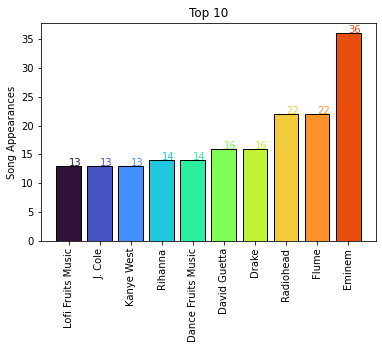

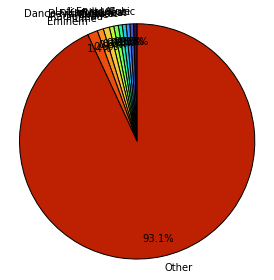

There are 739 unique genres in the playlist.


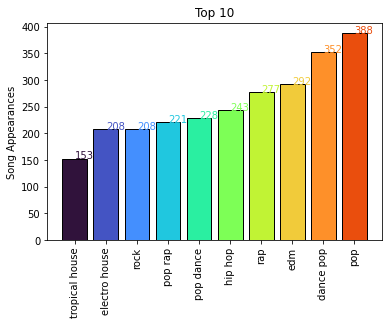

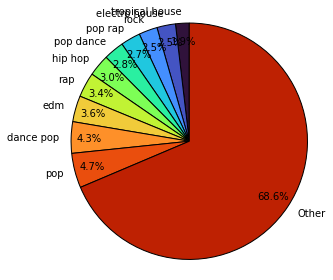

In [10]:
df_sta_ag, sta_num_artists, sta_num_genres = artistsgenres_dummies(df_sta)

#### General analysis of the songs in your outdated playlist. (Positive Data)

There are 243 unique artists in the playlist.


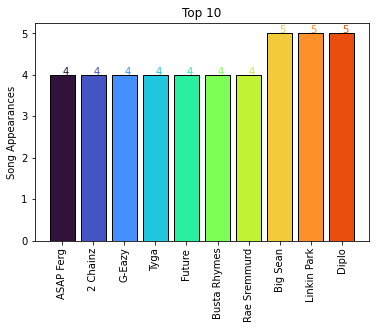

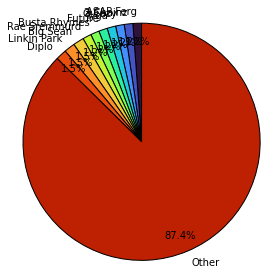

There are 218 unique genres in the playlist.


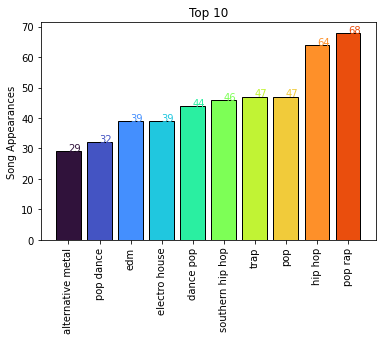

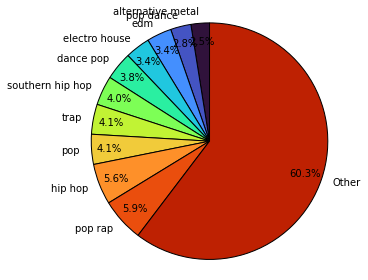

In [11]:
df_p_ag, p_num_artists, p_num_genres = artistsgenres_dummies(df_p)

#### General analysis of songs in both playlists. (Positive and Unlabelled Data)

#### Substituting artists and genres for dummy variables.

There are 1566 unique artists in the playlist.


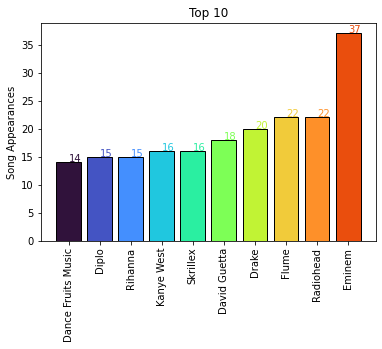

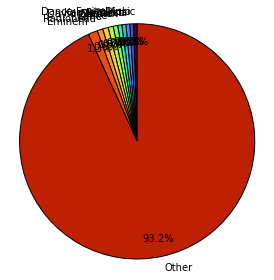

There are 757 unique genres in the playlist.


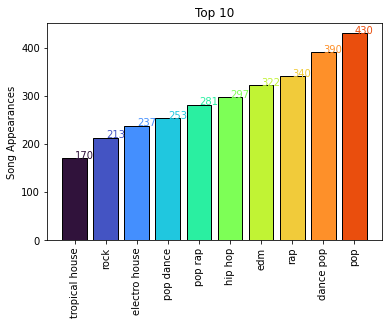

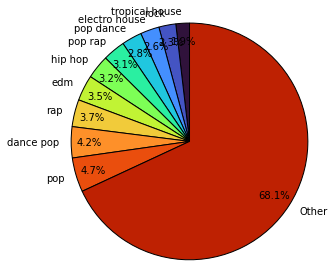

In [12]:
df_ag, df_num_artists, df_num_genres = artistsgenres_dummies(df)
df_ag.to_csv('Playlist_df_ag.csv', encoding='utf-8', index = False)

#### Removing the local songs as the Spotify API doesn't provide any parameters for them.

In [13]:
tot1 = df_ag.shape[0]
df_ag = df_ag.drop(df_ag[df_ag['date'] == ''].index)
df_ag = df_ag.reset_index(drop=True)
tot2 = df_ag.shape[0]
tot = tot1-tot2
print("There were %i local songs within both playlists. All are removed as they don't have any song parameters." %tot)
df_ag

There were 72 local songs within both playlists. All are removed as they don't have any song parameters.


,id,song,song_fil,artists,artists_fil,album,album_fil,date,local,time,...,baltimore hip hop,mississippi hip hop,nu skool breaks,west coast trap,basshall,post-hardcore,progressive post-hardcore,christian trap,ccm,worship
0,121,Glimpse of Us,glimpse of us,Joji,joji,Glimpse of Us,glimpse of us,2022-06-10,No,233456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,691,As It Was,as it was,Harry Styles,harry styles,As It Was,as it was,2022-03-31,No,167303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,656,I Ain't Worried,i ain't worried,OneRepublic,onerepublic,I Ain’t Worried (Music From The Motion Picture...,i ain’t worried (music from the motion picture...,2022-05-13,No,148486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,688,Late Night Talking,late night talking,Harry Styles,harry styles,Harry's House,harry's house,2022-05-20,No,177955,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,83,Jimmy Cooks (feat. 21 Savage),jimmy cooks,"Drake, 21 Savage","drake, 21 savage","Honestly, Nevermind","honestly, nevermind",2022-06-17,No,218365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,120,french toast,french toast,FLOYD WONDER,floyd wonder,french toast,french toast,2019-04-19,No,142720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1755,179,All I Want,all i want,A Day To Remember,a day to remember,What Separates Me From You,what separates me from you,2010-01-01,No,202640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1756,181,All Nite - Getter Remix,all nite - getter remix,"Destructo, E-40, Too $hort, Getter","destructo, e-40, too $hort, getter",All Nite (Remixes),all nite (remixes),2017-06-30,No,177231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1757,182,All Signs Point to Lauderdale,all signs point to lauderdale,A Day To Remember,a day to remember,What Separates Me From You,what separates me from you,2010-01-01,No,197200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Creating a dataframe for the features of each song.

In [14]:
df_ag.to_csv('Playlist_X.csv', encoding='utf-8', index = False)
df_ag.columns

Index(['id', 'song', 'song_fil', 'artists', 'artists_fil', 'album',
       'album_fil', 'date', 'local', 'time',
       ...
       'baltimore hip hop', 'mississippi hip hop', 'nu skool breaks',
       'west coast trap', 'basshall', 'post-hardcore',
       'progressive post-hardcore', 'christian trap', 'ccm', 'worship'],
      dtype='object', length=2349)

In [15]:
df_trackparams = df_ag.iloc[:,7:21]
df_trackgenres = df_ag.iloc[:,-(df_num_genres):]
X = pd.concat([df_trackparams,df_trackgenres], axis = 1)
X = X.drop(['local'], 1)

X['date'] = X['date'].apply(lambda x: str(x))
X['date'] = X['date'].apply(lambda x: re.split('-',x)[0])
X['date'] = X['date'].apply(lambda x: int(x))

X.to_csv('Playlist_X.csv', encoding='utf-8', index = False)
X

,date,time,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,baltimore hip hop,mississippi hip hop,nu skool breaks,west coast trap,basshall,post-hardcore,progressive post-hardcore,christian trap,ccm,worship
0,2022,233456,0.440,0.317,8.0,-9.258,1.0,0.0531,0.891000,0.000005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022,167303,0.520,0.731,6.0,-5.338,0.0,0.0557,0.342000,0.001010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,148486,0.704,0.797,0.0,-5.927,1.0,0.0475,0.082600,0.000745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022,177955,0.714,0.728,10.0,-4.595,1.0,0.0468,0.298000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022,218365,0.529,0.673,0.0,-4.711,1.0,0.1750,0.000307,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,2019,142720,0.644,0.897,10.0,-4.165,1.0,0.0757,0.041200,0.633000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1755,2010,202640,0.342,0.981,2.0,-3.228,0.0,0.1400,0.000025,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1756,2017,177231,0.726,0.928,0.0,-4.454,1.0,0.0934,0.001790,0.062700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1757,2010,197200,0.420,0.983,10.0,-3.437,1.0,0.1130,0.000263,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Standardizing the features.

In [16]:
X.iloc[:,:6] = preprocessing.StandardScaler().fit(X.iloc[:,:6]).transform(X.iloc[:,:6].astype(float))
X.iloc[:,7:13] = preprocessing.StandardScaler().fit(X.iloc[:,7:13]).transform(X.iloc[:,7:13].astype(float))
X

,date,time,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,baltimore hip hop,mississippi hip hop,nu skool breaks,west coast trap,basshall,post-hardcore,progressive post-hardcore,christian trap,ccm,worship
0,0.907652,0.264811,-1.302718,-2.220484,0.701513,-0.926708,1.0,-0.550648,3.204032,-0.394041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.907652,-0.750920,-0.810614,0.045349,0.160895,0.340868,0.0,-0.525118,0.801076,-0.389523,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.907652,-1.039842,0.321224,0.406569,-1.460960,0.150408,1.0,-0.605638,-0.334310,-0.390714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.907652,-0.587367,0.382737,0.028930,1.242131,0.581125,1.0,-0.612512,0.608489,-0.394063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.907652,0.033100,-0.755252,-0.272086,-1.460960,0.543615,1.0,0.646356,-0.694504,-0.394052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,0.674532,-1.128374,-0.047854,0.953872,1.242131,0.720170,1.0,-0.328726,-0.515516,2.451153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1755,-0.024827,-0.208346,-1.905545,1.413606,-0.920342,1.023160,0.0,0.302671,-0.695737,-0.394063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1756,0.519119,-0.598483,0.456553,1.123535,-1.460960,0.626719,1.0,-0.154920,-0.688013,-0.112238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1757,-0.024827,-0.291874,-1.425744,1.424552,1.242131,0.955577,1.0,0.037543,-0.694696,-0.394063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Dividing the dataframe into Positive/Unlabelled and X/y

In [17]:
j = df_ag.columns.get_loc("in playlist")
y = df_ag.iloc[:,j:j+1]
# print(np.array(y).reshape(1,-1))

y_pos = y[y['in playlist'] == 1]
y_unl = y[y['in playlist'] == -2]

X_pos = X.loc[y_pos.index]
X_unl = X.loc[y_unl.index]

pos_index = y_pos.index
unl_index = y_unl.index

pos = pd.concat((y_pos,X_pos),axis=1)
unl = pd.concat((y_unl,X_unl),axis=1)

num_pos = len(y_pos)
num_unl = len(y_unl)

print("There are %i songs in the current playlist." %num_pos)
print("There are %i songs in your music library." %num_unl)
unl

There are 179 songs in the current playlist.
There are 1580 songs in your music library.


,in playlist,date,time,danceability,energy,key,loudness,mode,speechiness,acousticness,...,baltimore hip hop,mississippi hip hop,nu skool breaks,west coast trap,basshall,post-hardcore,progressive post-hardcore,christian trap,ccm,worship
0,-2,0.907652,0.264811,-1.302718,-2.220484,0.701513,-0.926708,1.0,-0.550648,3.204032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2,0.907652,-0.750920,-0.810614,0.045349,0.160895,0.340868,0.0,-0.525118,0.801076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2,0.907652,-1.039842,0.321224,0.406569,-1.460960,0.150408,1.0,-0.605638,-0.334310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2,0.907652,-0.587367,0.382737,0.028930,1.242131,0.581125,1.0,-0.612512,0.608489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2,0.907652,0.033100,-0.755252,-0.272086,-1.460960,0.543615,1.0,0.646356,-0.694504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,-2,0.596826,-0.204554,-0.269300,0.072714,0.160895,-0.099550,1.0,0.548160,-0.472622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1576,-2,-2.589145,0.425678,0.204350,-0.206410,1.512440,-0.553226,1.0,-0.822650,0.061368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1577,-2,-0.024827,0.046734,-0.927489,0.702112,1.242131,0.414271,0.0,1.795244,-0.566727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1578,-2,-0.102534,0.327625,-1.271961,-0.726348,0.971822,-0.114748,1.0,-0.818722,-0.444172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PUL based on PHD article
#### https://visualstudiomagazine.com/articles/2021/05/20/pul-pytorch.aspx
#### Create and train a Binary NN Classifier using multiprocessing

1. The songs within the outdated playlist are the positive results.
2. The same number of songs are randomly selected from the songs to be considered, and set to negative results.
3. The NN is trained using the song from Steps 1-2.
4. The NN predicts the the probability of the unlabelled data not used is Step 2.
5. Steps 1-4 are repeated 8 times.
6. The probability of each unlabelled song is averaged.

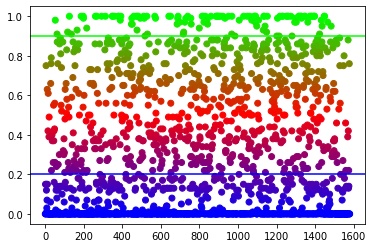

In [18]:
p = mult_pr_NN(unl,pos,X)
# print(p)
# print(p.shape)

#### Expanding probability matrix to fit the original matrix by giving the songs in the outdated playlist a probability of 1.

In [19]:
s = (pos.shape[0],1)
pp = np.ones(s)
p = np.concatenate((p,pp), axis=0)
# print(p.shape)

#### Organizing the songs based on the probability of each song fitting the outdated playlist.

In [20]:
from prettytable import PrettyTable

t = PrettyTable(['Prob','Song'])
song_name = pd.DataFrame(df_ag['song']).to_numpy()
in_playlist = pd.DataFrame(df_ag['in playlist']).to_numpy()
song_name_p = np.concatenate((song_name,p, in_playlist),axis = 1)
song_name_p_sorted = song_name_p[song_name_p[:,1].argsort()]
song_name_p_sorted = np.flip(song_name_p_sorted, axis=None)
song_name_p_sorted = np.delete(song_name_p_sorted, np.where(song_name_p_sorted[:, 0] == 1)[0], axis=0)
song_name_p_sorted = song_name_p_sorted[:,1:]
# print(song_name_p_sorted)
for i in range(unl.shape[0]):
    t.add_row([song_name_p_sorted[i][0], song_name_p_sorted[i][1]])
print(t)

+------+----------------------------------------------------------------------------------------------------------------------+
| Prob |                                                         Song                                                         |
+------+----------------------------------------------------------------------------------------------------------------------+
| 1.0  |                                          a p p l y i n g . p r e s s u r e                                           |
| 1.0  |                                                  Viking Death March                                                  |
| 1.0  |                                               Wait (The Whisper Song)                                                |
| 1.0  |                                                     Rock Is Dead                                                     |
| 1.0  |                                                        Twist                                   

#### Adding the songs probability to the original dataframe and creating a csv.

In [21]:
df_ag['probability'] = p
rec = df_ag[df_ag['in playlist'] == -2]
rec = rec.sort_values(by=['probability'], ascending=False)
rec.to_csv('Playlist_rec.csv', encoding='utf-8', index = False)
# rec_songs = rec['uri'].values.tolist()

#### Create a Spotify Playlist for the recommended songs with a probability >=0.9.

In [22]:
scope = 'playlist-modify-public'
username = '12167982535'
# username = input("\nWhat's your Spotify username? ")

token = SpotifyOAuth(client_id=cid, client_secret=secret, redirect_uri = 'http://localhost/', scope=scope,username=username)
sp = spotipy.Spotify(auth_manager=token)

playlist_name = input("Let's make a playlist for the songs I believe are most similar to your current playlist.\
                        What would you like to call this playlist? ")
sp.user_playlist_create(username, playlist_name, public=True, description='Suggested Songs')
print(f"\nPlaylist '%s' was created successfully."%playlist_name)

# python3 -m venv spotifyplaylistgenerator
# python -m venv .env
# .env\Scripts\activate
# set SPOTIPY_CLIENT_ID=
# set SPOTIPY_CLIENT_SECRET=
# set REDIRECT_URI=http://localhost/


Playlist 'Recommended Gym Songs' was created successfully.


#### Adding recommended songs to playlist.

In [23]:
import math
rec_songs = rec[rec['probability'] >= 0.9]

pre_playlist = sp.user_playlists(user=username)
playlist = pre_playlist['items'][0]['id']

print("There are %i songs recommended to be added to your outdated playlist." %len(rec_songs))
for i in range(math.floor(len(rec_songs)/100)):
    rec_songs_p = rec_songs[i*100:(i+1)*100]
    rec_songs_p= rec_songs_p['uri'].values.tolist()
    sp.user_playlist_add_tracks(user = username, playlist_id=playlist,tracks=rec_songs_p)
rec_songs_p = rec_songs[math.floor(len(rec_songs)/100)*100:(math.floor(len(rec_songs)/100)+1)*100]
rec_songs_p= rec_songs_p['uri'].values.tolist()
sp.user_playlist_add_tracks(user = username, playlist_id=playlist,tracks=rec_songs_p)


There are 123 songs recommended to be added to your outdated playlist.


{'snapshot_id': 'MywzMDRlMGM2YzJhNGYzZDdjNGRmZmIyYTc0NDM3MWEyYjY4MzBlMjJk'}

# Listen to your recommended songs and add away!!